                     p (mbar)  Observation  Tpot (K)  Tdew (degC)  rh (%)  \
Date_Time                                                                   
2009-01-01 00:10:00    996.52        -8.02    265.40        -8.90    93.3   
2009-01-01 00:20:00    996.57        -8.41    265.01        -9.28    93.4   
2009-01-01 00:30:00    996.53        -8.51    264.91        -9.31    93.9   
2009-01-01 00:40:00    996.51        -8.31    265.12        -9.07    94.2   
2009-01-01 00:50:00    996.51        -8.27    265.15        -9.04    94.1   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date_Time                                                                  
2009-01-01 00:10:00          3.33          3.11          0.22       1.94   
2009-01-01 00:20:00          3.23          3.02          0.21       1.89   
2009-01-01 00:30:00          3.21          3.01          0.20       1.88   
2009-01-01 00:40:00          3.26          3.07          0.19       1.92   
2009

<Axes: xlabel='Date_Time'>

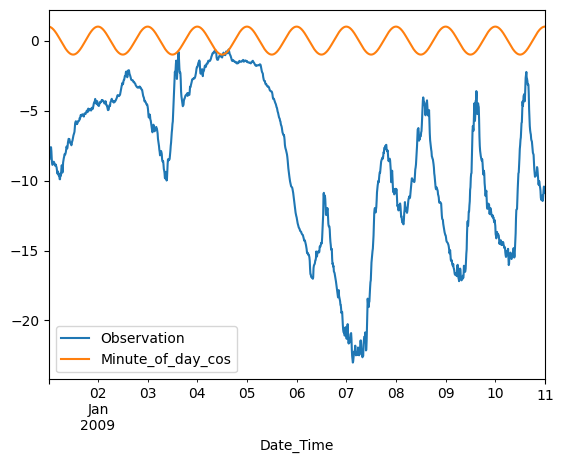

In [1]:
import forecasting_system.data_access_layer as dal
import forecasting_system.data_processor as dp
import forecasting_system.data_analyser as da
import forecasting_system.modeller as m
import datetime as dt
import numpy as np


observation_data = dal.read_data_file('jena_climate_2009_2016.csv')
observation_data = dp.format_jena_climate_data(observation_data, 'T (degC)', [])

# create basic calendar variables
observation_data['Minute_of_day'] = observation_data.index.to_series().dt.hour * 60 + observation_data.index.to_series().dt.minute
observation_data['Minute_of_day_cos'] = np.cos((observation_data['Minute_of_day']) * (2 * np.pi / 1440))
print(observation_data.head())
observation_data[['Observation', 'Minute_of_day_cos']][1:1440].plot()

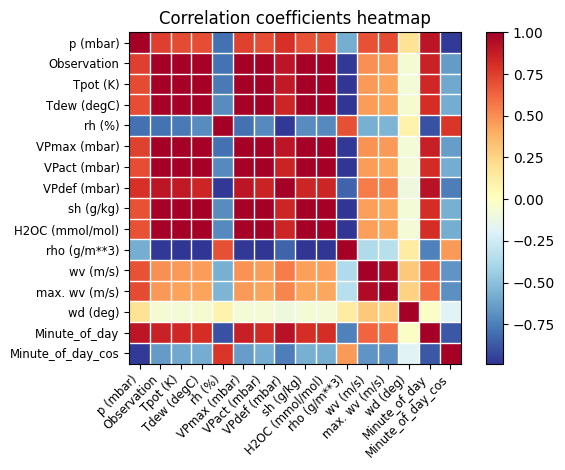

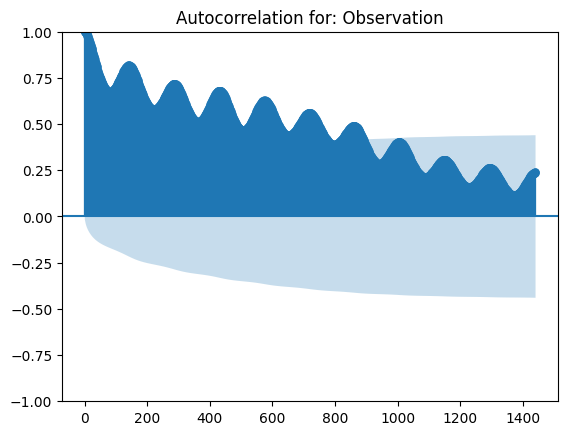

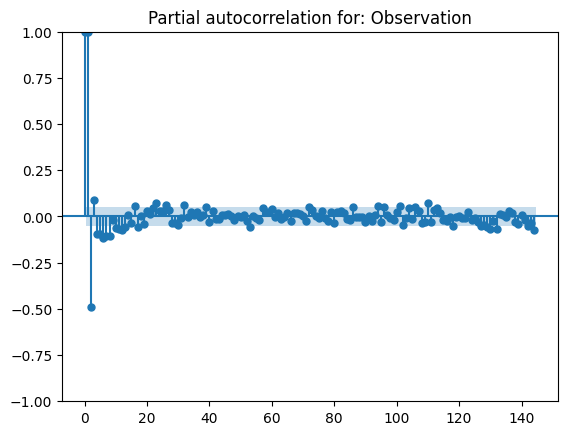

In [3]:
da.plot_correlation_heatmap(observation_data[1:100])
da.plot_autocorrelation(observation_data['Observation'][1:14400], 1440)
da.plot_partial_autocorrelation(observation_data['Observation'][1:1440], 144)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11251 (43.95 KB)
Trainable params: 11251 (43.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


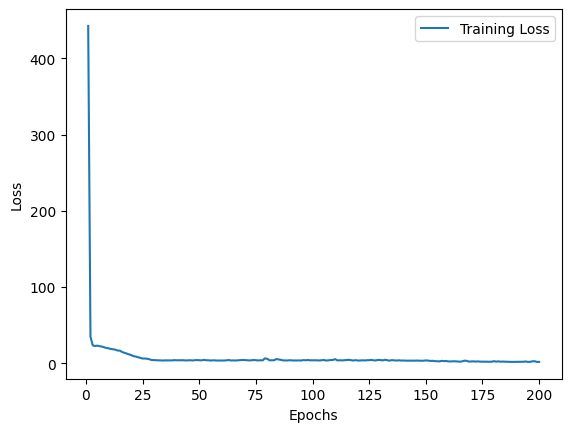

Trained Model (Lstm, {'normalise': False, 'Learning_rate': 0.01, 'Epochs': 200, 'Loss_function': 'mse', 'Plot_loss': True, 'variables': ['p (mbar)', 'VPact (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'Minute_of_day_cos']}) <keras.src.engine.sequential.Sequential object at 0x000001D169EFFCD0>


In [4]:
configuration = {
    # LSTM options
    'normalise': False,
    'Learning_rate': 0.01,
    'Epochs': 200,
    'Loss_function': 'mse',
    'Plot_loss': True,
    'variables': ['p (mbar)', 'VPact (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'Minute_of_day_cos']
}

model = m.create_model('Lstm', configuration)
m.train_model(model, observation_data, '2009-01-01', '2009-01-07')
print(model)

63/63 [==============================] - 0s 694us/step
{'MAE': 1.6505622516296639, 'RMSE': 2.169668760630446, 'MAPE': 3901532305456.794}


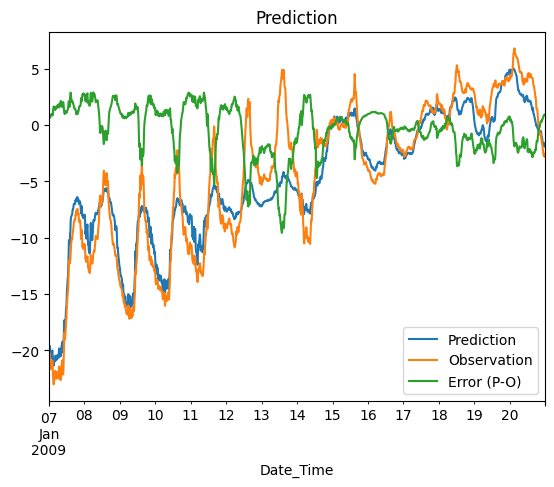

In [6]:
prediction = m.predict_from_model(model, observation_data, '2009-01-07', 14*24*6, dt.timedelta(minutes=10))
print(prediction.calculate_metrics())
prediction.plot()